In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('IntroDSProject/nj_data.csv')
df.head()

,month_date_yyyymm,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202503,34021,"mercer, nj",450000.0,0.0417,0.1253,497.0,0.2196,0.5678,29.0,...,723244.0,0.0283,0.0999,921.0,0.1259,0.1245,0.8773,-0.1546,-0.7253,0.0
1,202503,34011,"cumberland, nj",299900.0,0.0019,0.1317,298.0,0.0438,0.2263,44.0,...,341804.0,0.0003,0.1466,456.0,0.0247,0.0780,0.5201,-0.0350,-0.2288,0.0
2,202503,34007,"camden, nj",339900.0,0.0073,0.0458,627.0,0.0727,0.2343,26.0,...,394468.0,0.0435,0.0874,1268.0,0.1388,0.0755,1.0319,0.0995,-0.2949,0.0
3,202503,34019,"hunterdon, nj",699000.0,0.0421,-0.0668,178.0,0.1266,-0.1721,32.0,...,1052101.0,-0.0069,0.0706,334.0,0.1096,-0.1544,0.8989,-0.0283,0.0245,0.0
4,202503,34005,"burlington, nj",399000.0,0.0166,0.0237,681.0,0.1155,0.5584,26.0,...,522959.0,0.0175,-0.0681,1336.0,0.1274,0.1390,0.9721,0.0065,-0.7144,0.0


In [6]:
df = df[df['month_date_yyyymm'] >= 202501]
m1 = df.isnull().sum()
print("Missing values per column:")
print(m1[m1 > 0])

Missing values per column:
price_increased_count_mm    8
price_increased_count_yy    6
dtype: int64


In [7]:
print("Stats:")
print(df.describe())

growth = df.sort_values('median_listing_price_yy', ascending=False)
print("\nTop 5 Counties by Year-over-Year Price Growth:")
print(growth[['county_name', 'median_listing_price_yy']].head())

sales = df.sort_values('median_days_on_market', ascending=True)
print("\nTop 5 Fastest Selling Counties (Lowest Median Days on the market):")
print(sales[['county_name', 'median_days_on_market']].head())

marketss = df.sort_values('pending_ratio', ascending=False)
print("\nTop 5 Hottest Markets (highest pending ratios):")
print(marketss[['county_name', 'pending_ratio']].head())

Stats:
       month_date_yyyymm   county_fips  median_listing_price  \
count          63.000000     63.000000             63.000000   
mean       202502.000000  34021.000000         537278.349206   
std             0.823055     12.207877         169123.989322   
min        202501.000000  34001.000000         299319.000000   
25%        202501.000000  34011.000000         399925.000000   
50%        202502.000000  34021.000000         530750.000000   
75%        202503.000000  34031.000000         672875.000000   
max        202503.000000  34041.000000         862281.000000   

       median_listing_price_mm  median_listing_price_yy  active_listing_count  \
count                63.000000                63.000000             63.000000   
mean                  0.005387                 0.042713            586.555556   
std                   0.023937                 0.057699            364.693012   
min                  -0.043600                -0.081000            150.000000   
25%        

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    x='median_listing_price_yy',
    y='county_name',
    data=growth.head(10)
)
plt.title('Top 10 NJ Counties by Year-over-Year Price Growth')
plt.xlabel('Price Growth (%)')
plt.ylabel('County Name')
plt.show()
plt.figure(figsize=(12,6))
sns.barplot(
    x='pending_ratio',
    y='county_name',
    data=marketss.head(10)
)
plt.title('Top 10 NJ Counties by Pending Ratio')
plt.xlabel('Pending Ratio')
plt.ylabel('County Name')
plt.show()

In [10]:
cols = ['pending_ratio', 'median_days_on_market', 'active_listing_count']
ma3 = 'median_listing_price'
x = df[cols]
y = df[ma3]
xtr, xte, ytr, yte = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(xtr, ytr)
yp = model.predict(xte)
comp = pd.DataFrame({
    'Actual Price': yte.values,
    'Predicted Price': yp
})
print(comp.head(10))

   Actual Price  Predicted Price
0      610950.0    602554.740198
1      310950.0    517817.367763
2      450000.0    536960.284202
3      339497.0    559811.415328
4      369990.0    526092.934366
5      529475.0    584327.035702
6      599900.0    735534.130963
7      849450.0    634266.848177
8      392475.0    553610.640836
9      388400.0    566428.763434


In [11]:
mae = mean_absolute_error(yte, yp)
r2 = r2_score(yte, yp)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score: {r2:.4f}")

Mean Absolute Error (MAE): 163719.18
R2 Score: -0.3532


The feature impact on median listing price:
                 Feature   Coefficient
1  median_days_on_market    403.749599
2   active_listing_count    158.367164
0          pending_ratio -47902.007233


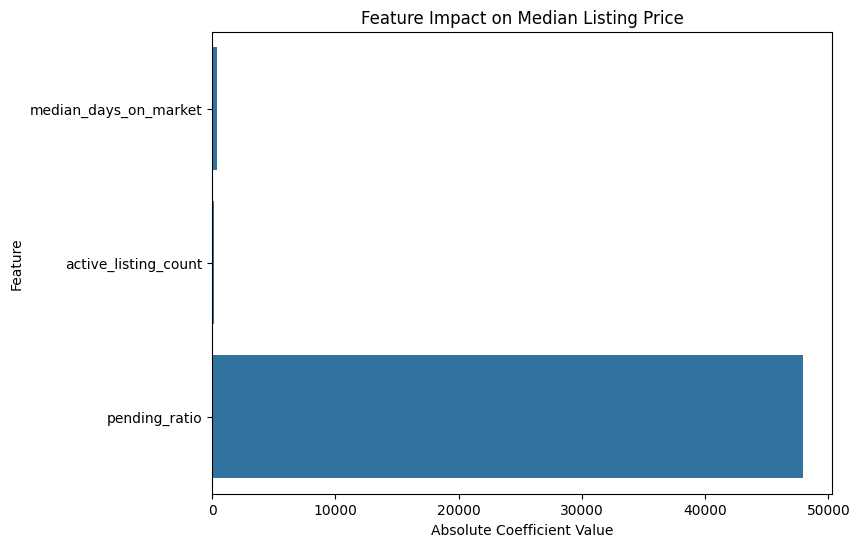

In [12]:
cf = pd.DataFrame({
    'Feature': cols,
    'Coefficient': model.coef_
})
cf = cf.sort_values(by='Coefficient', ascending=False)
print("The feature impact on median listing price:")
print(cf)
cf['AbsCoefficient'] = cf['Coefficient'].abs()
plt.figure(figsize=(8,6))
sns.barplot(x='AbsCoefficient', y='Feature', data=cf)
plt.title('Feature Impact on Median Listing Price')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

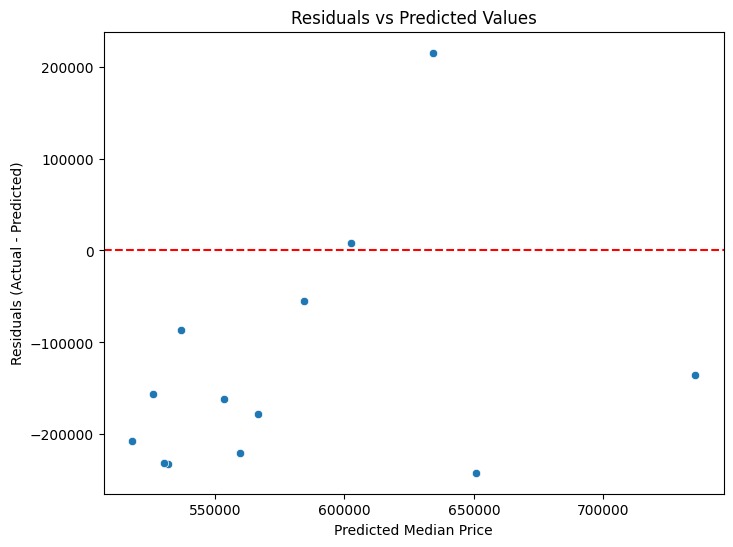

In [13]:
re1 = yte - yp
plt.figure(figsize=(8,6))
sns.scatterplot(x=yp, y=re1)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Median Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

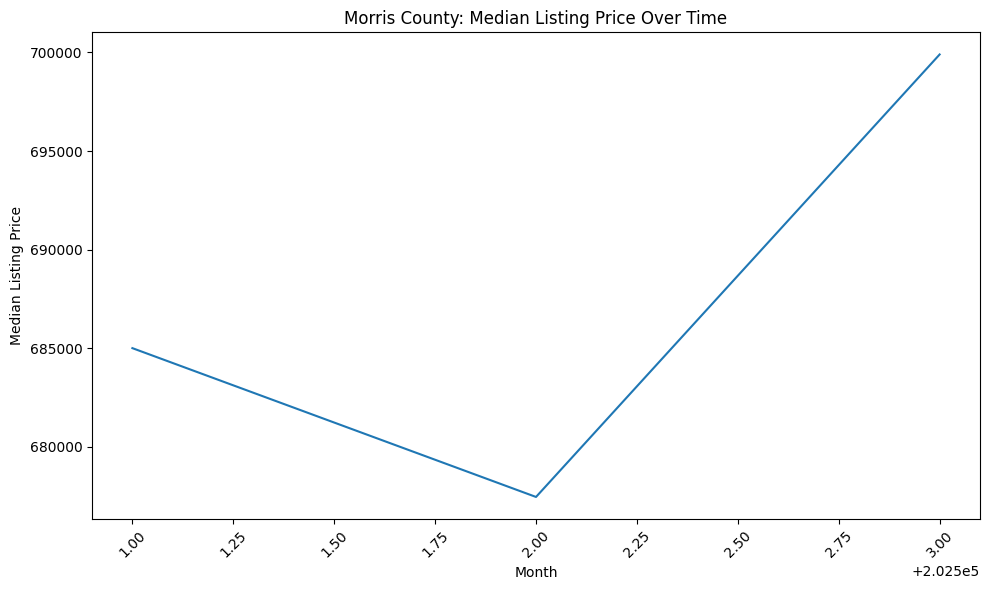

In [14]:
morris = df[df['county_name'].str.contains("morris", case=False)].copy()
morris = morris.sort_values(by='month_date_yyyymm')
plt.figure(figsize=(10,6))
plt.plot(morris['month_date_yyyymm'], morris['median_listing_price'])
plt.title("Morris County: Median Listing Price Over Time")
plt.xlabel("Month")
plt.ylabel("Median Listing Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()